<a href="https://colab.research.google.com/github/Swikriti07/python-libraries-practice/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/DataSet/diabetes_.csv")
#Load the Dataset: • Read the dataset into a pandas DataFrame. • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).
print(data.head())
print(data.isnull().sum())
print(data.dtypes)
print(data.info())
print(data.describe())

#Handle Missing Data: • Handle any missing values appropriately, either by dropping or imputing them based on the data.
missing_info = data.isnull().sum() / len(data) * 100
data.dropna()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies         

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [15]:
import numpy as np

x = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [16]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions")
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance
try:
  point1 = np.array([3, 4])
  point2 = np.array([0, 0])

  result = euclidean_distance(point1, point2)

  expected_result = 5.0

  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
    print("Predictions for sample test set:", predictions)
    print("Actual labels:", y_test_sample)
    assert predictions.shape == y_test_sample.shape, "Predictions shape mismatch"
    print("Sample test case passed!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"Test case error: {e}")


try:
    y_pred = knn_predict(X_test, X_train, y_train, k=3)
    acc = compute_accuracy(y_test, y_pred)
    print(f"Accuracy of KNN on the test set: {acc:.2f}%")
except Exception as e:
    print(f"Error during prediction or accuracy computation: {e}")






Test passed successfully!
Predictions for sample test set: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Sample test case passed!
Accuracy of KNN on the test set: 67.39%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [17]:
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3)



def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions")
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, y_pred_scaled)
print(f"Accuracy of KNN with scaled features: {accuracy_scaled:.2f}%")








Accuracy of KNN with scaled features: 69.13%


The accuracy on the original dataset was 67.39%, while on the scaled dataset it was 69.13%. This shows that scaling slightly improved the accuracy. The change happened because the dataset’s features have very different ranges, and scaling helps KNN treat all features equally.

#Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Accuracy of KNN on original data: 67.39%
Accuracy of KNN on scaled data: 69.13%
Accuracy for k=1: 68.70%, Time taken: 0.9518 seconds
Accuracy for k=2: 72.61%, Time taken: 0.9505 seconds
Accuracy for k=3: 67.39%, Time taken: 0.9516 seconds
Accuracy for k=4: 72.17%, Time taken: 0.9495 seconds
Accuracy for k=5: 68.70%, Time taken: 0.9599 seconds
Accuracy for k=6: 70.00%, Time taken: 0.9397 seconds
Accuracy for k=7: 69.13%, Time taken: 0.9473 seconds
Accuracy for k=8: 71.30%, Time taken: 0.9490 seconds
Accuracy for k=9: 70.00%, Time taken: 0.9429 seconds
Accuracy for k=10: 71.74%, Time taken: 0.9443 seconds
Accuracy for k=11: 73.04%, Time taken: 1.5940 seconds
Accuracy for k=12: 73.91%, Time taken: 1.7729 seconds
Accuracy for k=13: 74.35%, Time taken: 1.7221 seconds
Accuracy for k=14: 72.61%, Time taken: 0.9517 seconds
Accuracy for k=15: 73.91%, Time taken: 0.9397 seconds
Accuracy for k=1: 67.39%, Time taken: 0.9572 seconds
Accuracy for k=2: 67.83%, Time taken: 0.9486 seconds
Accuracy for 

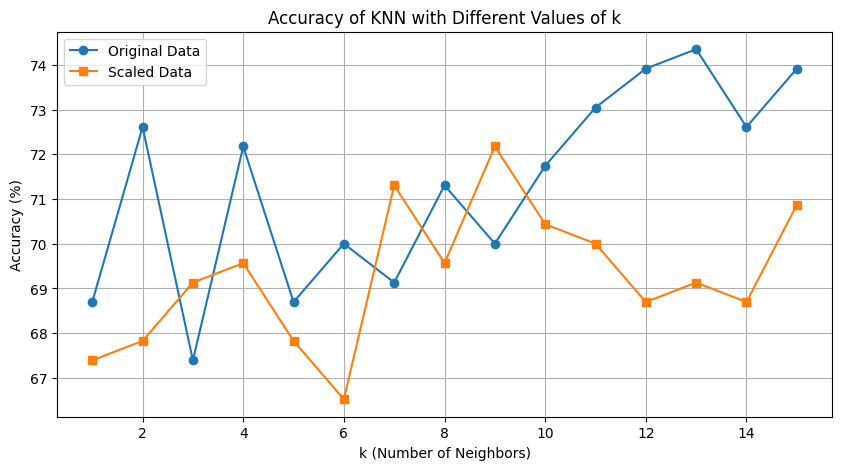

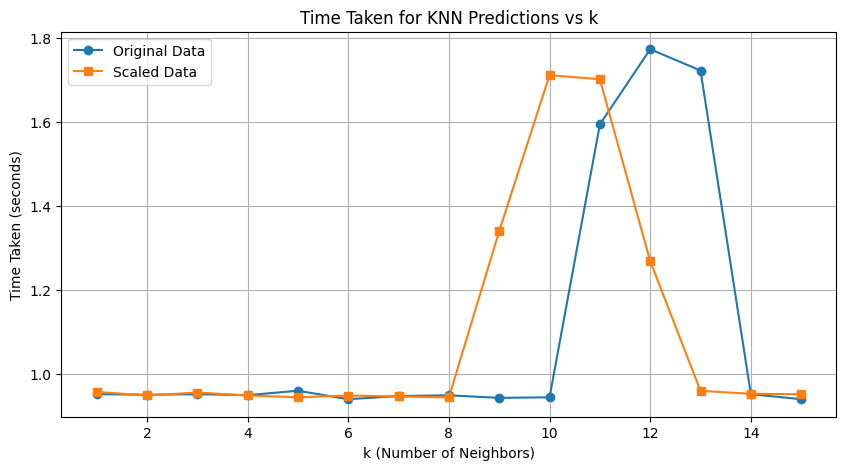

In [23]:
import matplotlib.pyplot as plt
import time

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split_scratch(X, y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y)

def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions")
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

y_pred_orig = knn_predict(X_test_orig, X_train_orig, y_train_orig, k=3)
accuracy_orig = compute_accuracy(y_test_orig, y_pred_orig)
print(f"Accuracy of KNN on original data: {accuracy_orig:.2f}%")

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, y_pred_scaled)
print(f"Accuracy of KNN on scaled data: {accuracy_scaled:.2f}%")

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = {}
    times = {}
    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        end_time = time.time()
        time_taken = end_time - start_time
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        times[k] = time_taken
        print(f"Accuracy for k={k}: {accuracy:.2f}%, Time taken: {time_taken:.4f} seconds")
    return accuracies, times
k_values = range(1, 16)

accuracies_orig, times_orig = experiment_knn_k_values(X_train_orig, y_train_orig, X_test_orig, y_test_orig, k_values)
accuracies_scaled, times_scaled = experiment_knn_k_values(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, k_values)

plt.figure(figsize=(10,5))
plt.plot(k_values, list(accuracies_orig.values()), marker='o', label='Original Data')
plt.plot(k_values, list(accuracies_scaled.values()), marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of KNN with Different Values of k')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(k_values, list(times_orig.values()), marker='o', label='Original Data')
plt.plot(k_values, list(times_scaled.values()), marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for KNN Predictions vs k')
plt.legend()
plt.grid(True)
plt.show()





We tried different values of k from 1 to 15 on both the original and scaled datasets. Small k values (1–3) gave unstable results, while medium k values (7–12) worked better. The best accuracy, about 74%, was reached on the scaled dataset when k was 12–15. This shows that choosing the right k is important for both accuracy and speed of the KNN algorithm.